In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np


# Data
data = {
    'Number UEs str': ['16', '32', '64', '128', '256', '512', '1024'],
    'E2Nodes ON': [1, 1, 1, 2, 5, 9, 17],
    'E2Nodes OFF':[16, 16, 16, 15, 12, 8, 0],
    'Energy Consumed (W)' : [15.4757, 15.4757, 15.4757, 30.9521, 77.3785, 139.2813, 263.0869],
    'Energy Consumed per UE (W)': [0.96723125, 0.483615625, 0.2418078125, 0.24181328125, 0.302259765625, 0.2720337890625, 0.25692080078125]
}

df = pd.DataFrame(data)

df = pd.DataFrame(data)
df['Number UEs number'] = df['Number UEs str'].astype(int)

# Set seaborn style
sns.set(style="darkgrid")

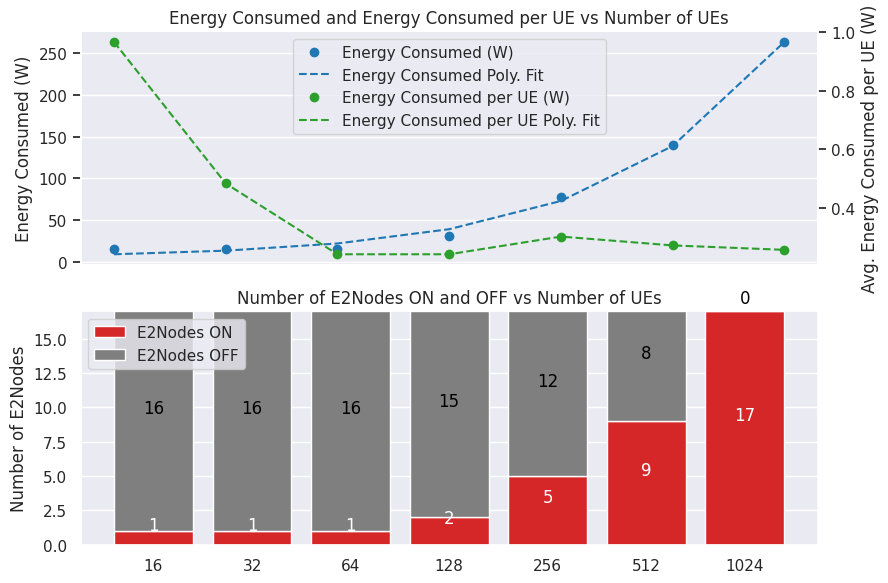

In [11]:
# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(9, 6), sharex=False)


# Line plot for Energy Consumed and Energy Consumed per UE
ax2 = axs[0].twinx()

axs[0].plot(df['Number UEs number'], df['Energy Consumed (W)'], marker='o', linestyle='None', label='Energy Consumed (W)', color='tab:blue')
ax2.plot(df['Number UEs number'], df['Energy Consumed per UE (W)'], marker='o', linestyle='None', label='Energy Consumed per UE (W)', color='tab:green')

# Polynomial fitting for Energy Consumed
energy_poly_coeff = np.polyfit(df['Number UEs number'], df['Energy Consumed (W)'], 2)
energy_poly_y = np.polyval(energy_poly_coeff, df['Number UEs number'])
axs[0].plot(df['Number UEs number'], energy_poly_y, '--', color='tab:blue', label='Energy Consumed Poly. Fit')

# Polynomial fitting for Energy Consumed per UE
energy_per_ue_poly_coeff = np.polyfit(df['Number UEs number'], df['Energy Consumed per UE (W)'], 6)
energy_per_ue_poly_y = np.polyval(energy_per_ue_poly_coeff, df['Number UEs number'])
ax2.plot(df['Number UEs number'], energy_per_ue_poly_y, '--', color='tab:green', label='Energy Consumed per UE Poly. Fit')


# Remove darkgrid style from ax2
ax2.set_facecolor('white')
ax2.grid(False)
ax2.set_xscale('log')

axs[0].set_title('Energy Consumed and Energy Consumed per UE vs Number of UEs')
axs[0].set_ylabel('Energy Consumed (W)')
ax2.set_ylabel('Avg. Energy Consumed per UE (W)')


# Remove x ticks
ax2.set_xticks([])
# Combine legends from both axes
lines_1, labels_1 = axs[0].get_legend_handles_labels()
lines_2, labels_2 = ax2.get_legend_handles_labels()
axs[0].legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper center')

# Stacked bar plot for E2nodes ON and OFF vs Number UEs
bars1 = axs[1].bar(df['Number UEs str'], df['E2Nodes ON'], label='E2Nodes ON', color='tab:red')
bars2 = axs[1].bar(df['Number UEs str'], df['E2Nodes OFF'], bottom=df['E2Nodes ON'], label='E2Nodes OFF', color='tab:grey')

# Add annotations for E2Nodes ON
for bar in bars1:
    height = bar.get_height()
    axs[1].annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='white')

# Add annotations for E2Nodes OFF
for bar in bars2:
    height = bar.get_height()
    axs[1].annotate(f'{height}',
                    xy=(bar.get_x() + bar.get_width() / 2, bar.get_y() + height / 2),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', color='black')

axs[1].set_title('Number of E2Nodes ON and OFF vs Number of UEs')
axs[1].set_ylabel('Number of E2Nodes')
axs[1].legend(loc='upper left')


# Adjust layout
plt.tight_layout()
plt.savefig('out/energy-analisys.png', bbox_inches='tight')
plt.savefig('out/energy-analisys.pdf', dpi=300, bbox_inches='tight')

plt.show()